# Matemática para Ciencia de los Datos
### Trabajo práctico 2 (TP2)

María Auxiliadora Mora
Instituto Tecnológico de Costa Rica, 

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo zip con los resultados de los ejercicios. 

Modo de trabajo: en grupo máximo de dos personas.


---

Resumen: En el presente trabajo práctico se realizarán ejercicios para repasar aspectos básicos del algebra lineal, cálculo matricial y preprocesamiento de datos. 

---


**Pregunta 1 (30 puntos)**

**Exploración, visualización de datos y cálculo matricial.**

1) Para el ejercicio se va a utilizar el conjunto de datos "Used Cars Price Prediction" https://www.kaggle.com/avikasliwal/used-cars-price-prediction. Utilice las columnas numéricas para el ejercicio. Verifique que los campos numéricos no contenga caracteres.

2) Cargue los datos utilizando un dataframe de Pandas. 

3) Despliegue la lista de columnas y elimine las columnas con datos no numéricos. 

4) Despliegue datos estadísticos del dataframe como la media, desviación estándar, entre otros.

5) Explore y visualice la relación de los datos utilizando gráficos de dispersión.

6) Seleccione una columna y elimine datos atípicos.

7) Despliegue un mapa de calor de los datos.

8) Convierta los datos a una matriz de Pytorch y utilice tensores de Pytorch para realizar el resto del ejercicio.

9) Se desea expresar los datos de la forma $A\vec{x}=b$ donde $b$, el objetivo, es un vector con los datos de la última columna (asumiendo que queremos predecir el precio medio de las autos usados en el conjunto de datos, este corresponde a la columna price). El resto de las columnas representarán la matriz $A$. 

- Una vez divididos los datos, proponga valores de $\vec{x}$ que tengan sentido de forma intuitiva para realizar la multiplicación matriz-vector. El resultado ideal de esta multiplicación es tener una predicción de los valores de los autos. El objetivo de este ejercicio es que los estudiantes se familiaricen con los datos. Es útil en este tipo de tareas validar el conocimiento de dominio con lo que eventualmente generará un modelo. Revise el ejercicio práctico visto en clase. 
- Ordenar el conjunto de datos original de mayor o menor (por precio del auto) y agregar una columna de 1 hasta $m$, donde $m$ es el total de filas, que reflejen un escalafón de autos más o menos costosos. Repetir el proceso con los pesos $\vec{x}$ de ejemplo y comparar, visualmente, qué tan cercano es el escalafón real al de predicción. Posteriormente, genere una métrica para comparar los escalafones.


https://realpython.com/python-data-cleaning-numpy-pandas/


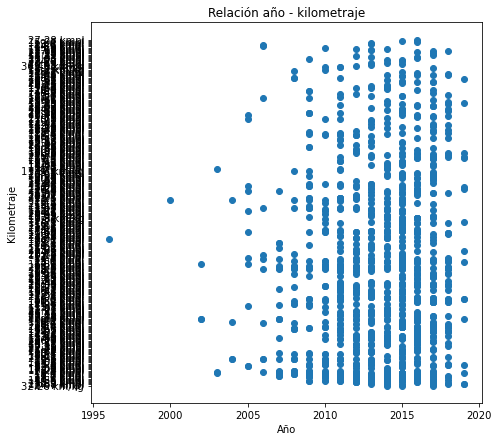

In [19]:
# Bibliotecas a utilizar
###############################################################################
import torch 
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# distribución del precio y el área de construcción.
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
  
#Cargue los datos utilizando un dataframe de Pandas.
df = pd.read_csv('datasets/test-data.csv')
df.head()
#Despliegue la lista de columnas y elimine las columnas con datos no numéricos.
to_drop = ['Unnamed: 0',  #check if delete it
           'Name',
           'Location',
           'Fuel_Type',
           'Transmission',
           'Owner_Type']

df.drop(to_drop, inplace=True, axis=1)
df.head()
#Despliegue datos estadísticos del dataframe como la media, desviación estándar, entre otros.
df.describe()

#Explore y visualice la relación de los datos utilizando gráficos de dispersión.
plot_data(df,'Year', 'Mileage', 'Año','Kilometraje',
          'Relación año - kilometraje')  

#plot_data(df,'Year', 'Mileage', 'Año','Kilometraje',
#          'Relación año - kilometraje') 

#plot_data(df,'Year', 'Mileage', 'Año','Kilometraje',
#          'Relación año - kilometraje') 

#plot_data(df,'Year', 'Mileage', 'Año','Kilometraje',
#          'Relación año - kilometraje') 


**Pregunta 2 (10 puntos)**

**Convolución** 

a) (5 puntos) Programe manualmente usando tensores de Pytorch, pero sin utilizar funiones predefinidas en la biblioteca, la función convolucion2D que reciba una imagen, un kernel de cualquier tamaño, el tamaño del padding a aplicar y devuelva la imagen resultante de la convolución.

b) (2 puntos) Cargue una imagen de prueba en escala de grises o convierta alguna imagen a escala de grises (adjunte el archivo de imagen de prueba con el archivo del trabajo en un zip).

c) (3 puntos) Investigue qué son los filtros de desenfoque gaussiano y aplique al menos dos kernels de este tipo con diferentes tamaño en su imagen utilizando la función convolucion2D que desarrolló en el punto 1.